# Gradient Boost Implementation

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

## Data Preparation

<b>Load the Data<b>

In [6]:
boston_df = load_boston()

<b>Split to dependent and independent features<b>

In [7]:
X = pd.DataFrame(data=boston_df['data'], columns = boston_df['feature_names']) # independent variables
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
y=pd.Series(boston_df['target']) # dependent variable
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

<b>Dataset info:<b>

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

Here **MEDV** feature is our target features. Remaining are independent features.

<b>Split data into train set and test set<b>

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# test size is 20% of the total data
# train size is 80% of the total data

In [15]:
X_train[1:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28


In [16]:
y_test[1:4]

274    32.4
491    13.6
72     22.8
dtype: float64

## Model Training and Evaluation

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

<b>Create gradient regressor object<b>

In [18]:
gradient_regressor = GradientBoostingRegressor(n_estimators=3, learning_rate=1.0, max_depth=2)
gradient_regressor

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

**Parameters:**

1. ``n_estimators`` - number of trees. Default: 100
2. ``max_depth`` - maximum depth of the tree. Default: 3
3. ``learning_rate`` - tells what is the default weight should be assigned to 100 models. It uses 1 as default weight value. So weight 1 is assigned to model 1, model 2 and so on.

<b>train gradient regressor<b>

In [19]:
reg = gradient_regressor.fit(X_train, y_train)
reg

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

<b>Prediction<b>

In [21]:
y_pred = reg.predict(X_test)
y_pred

array([22.92806143, 26.61175366, 14.43253537, 22.92806143, 14.43253537,
       22.92806143, 14.43253537, 14.43253537, 22.92806143, 22.92806143,
       14.43253537, 14.43253537,  9.41076179, 22.92806143, 22.92806143,
       31.96684552, 14.43253537, 14.43253537, 47.93712312, 14.43253537,
       22.92806143, 22.92806143, 14.43253537, 22.92806143, 14.43253537,
       14.43253537, 22.92806143, 14.43253537, 14.43253537, 22.92806143,
       14.43253537, 22.92806143, 26.94507194, 22.92806143, 14.43253537,
       14.43253537, 35.65053775, 22.92806143, 14.43253537, 22.92806143,
       14.43253537, 22.92806143, 47.93712312, 22.92806143, 22.92806143,
       14.43253537, 14.43253537, 22.92806143, 14.43253537, 26.61175366,
       22.92806143, 35.65053775, 14.43253537, 22.92806143, 47.93712312,
       22.92806143, 14.43253537, 26.61175366, 22.92806143, 14.43253537,
       22.92806143, 35.65053775, 26.61175366, 22.92806143, 22.92806143,
       14.43253537, 14.43253537, 22.92806143, 26.61175366, 14.43

<b>Compare predicted results with real result<b>

Ie. We compare predicted result ``y_pred`` with real results ``y_test`` to check the accuracy of the results and to identify which one is good and provide more accurate results.

For that we use a concept called ``R Square``.

- Most of the time R Square value ranging b/w 0.8 to 0.9.
- R Square will be greater than 0.8.
- Usually they will any way range b/w 0 and 1.
- If R Square value is nearer to 1, it indicates that model is very good.

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
score = r2_score(y_test, y_pred)
score

0.705385570320752

In [24]:
error = mean_squared_error(y_test, y_pred)
error

21.60519070200019

**Inference**

Here r2_score value is 0.70 which is good for model. mean squared error is 21 which is less.

## Plot the important features

In [26]:
import matplotlib.pyplot as plt

<b>feature importance<b>

``feature_importance_`` gives us which of the features are important to the model.

In [27]:
feature_importance = reg.feature_importances_
feature_importance

array([0.03076099, 0.        , 0.        , 0.        , 0.        ,
       0.66507295, 0.        , 0.02568836, 0.04181996, 0.        ,
       0.        , 0.        , 0.23665774])

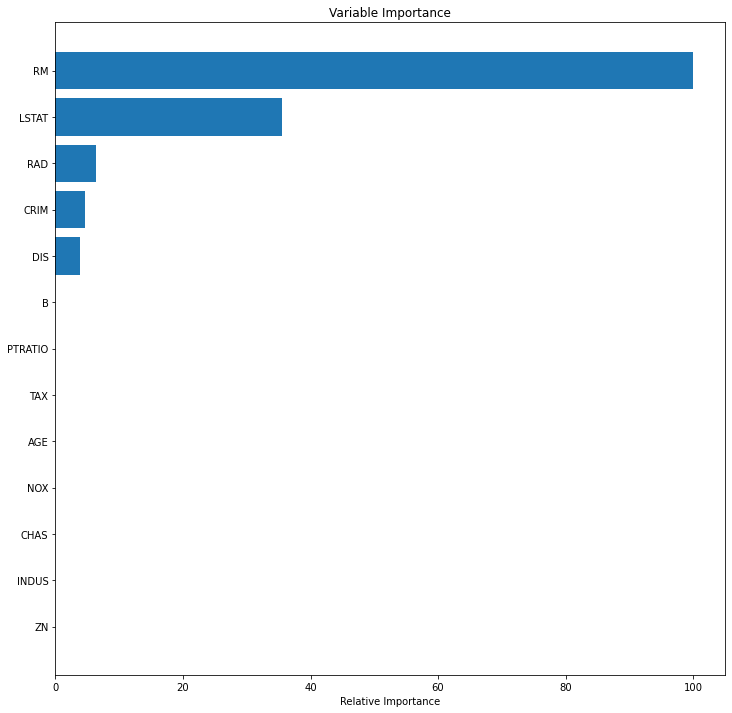

In [29]:
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 12))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

**Inference**

From the plot we can understand that ``RM`` is the most important feature to the model. we can improve model accuracy. right now the accuracy is 70%. For that we tune the hyperparameters.


## Tune the hyperparameters

time: 6: 20


https://www.youtube.com/watch?v=OUk7Xvs8iS8